In [162]:
import cv2  
import numpy as np       
import os                  
from random import shuffle 
from tqdm import tqdm      
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from numpy import nan
from numba import jit, cuda
scores=dict()
import random
path1= r'C:\Users\avida\Downloads\dogs-vs-cats-redux-kernels-edition\train\train/'
IMG_SIZE=32
LR = 1e-3
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [163]:
filenames=os.listdir(path1)
category=[]
#dog is 1 cat is 0
for filename in filenames:
    if 'dog' in filename:
        category.append(1)
    else:
        category.append(0)

df={'filename':filenames,'label':category}
df=pd.DataFrame(df)

In [164]:
train_df, test_df = train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
train_df=train_df.drop("index",axis=1)
test_df=test_df.drop("index",axis=1)

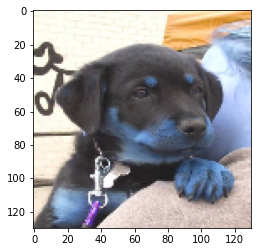

In [165]:
image = cv2.imread(path1+'/'+train_df['filename'][7])
image = cv2.resize(image, (130,130))
plt.imshow(image)

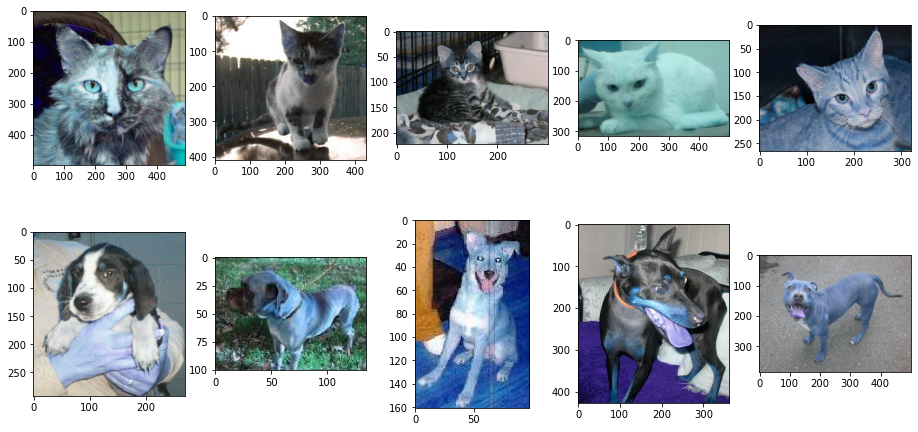

In [166]:
fig = plt.figure(figsize=(45,45))
#
for i in range(10,15):
    img=cv2.imread(path1+'/'+r'cat.{}.jpg'.format(i))
    ax=fig.add_subplot(11,14,i)
    plt.imshow(img)
    img=cv2.imread(path1+'/'+r'dog.{}.jpg'.format(i))
    ax=fig.add_subplot(11,14,i+14)
    plt.imshow(img)

In [167]:
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [168]:
labal_data =[]
training_data = []
for img in tqdm(os.listdir(path1)):
        label = label_img(img)
        path = os.path.join(path1,img)
        img = cv2.imread(path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
        training_data.append(pd.Series(img.flatten()))
        labal_data.append(label)

100%|██████████| 25000/25000 [01:52<00:00, 221.63it/s]


In [169]:
x_train = pd.DataFrame(training_data)
y_train = pd.DataFrame(labal_data, columns = ['labels'])

In [170]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,93,170,209,103,181,224,114,192,235,119,...,1,4,3,0,3,3,0,3,2,1
1,45,43,39,45,45,40,52,53,44,52,...,48,57,73,47,52,69,43,48,63,1
2,57,50,41,66,59,50,68,61,52,70,...,116,140,147,30,160,168,6,185,187,1
3,218,223,222,227,229,228,227,228,228,227,...,205,208,207,213,214,212,210,214,216,1
4,62,97,124,45,83,109,82,124,149,111,...,51,76,90,65,90,104,57,83,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,108,145,149,112,149,153,115,152,156,117,...,131,167,177,133,168,178,134,169,179,0
24996,61,88,115,62,90,111,56,86,110,50,...,55,82,109,52,80,103,52,81,102,0
24997,38,41,44,47,50,51,44,48,49,41,...,79,128,154,93,137,169,94,132,166,0
24998,244,243,252,176,192,230,97,123,140,70,...,99,111,102,104,111,113,113,116,126,0


In [171]:
#cheking if there null in the data
train_data.isnull().any().sum()

0

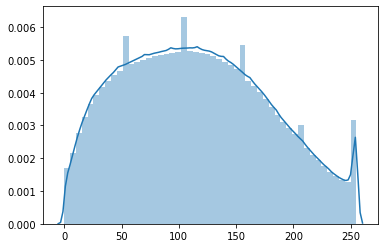

In [172]:
#the distribution of all the data after cleaning
sns.distplot(train_data);

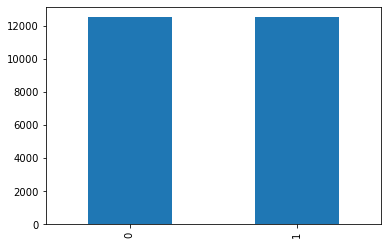

In [173]:
train_data['labels'].value_counts().sort_index().plot.bar()

In [174]:
y_train= train_data["labels"]
x_train= train_data.drop(labels = ["labels"], axis = 1)

In [175]:
scale = StandardScaler()
x__data_test = pd.DataFrame(scale.fit_transform(x_test.values), columns=x_test.columns, index=x_test.index)
x_train = pd.DataFrame(scale.fit_transform(x_train.values), columns=x_train.columns, index=x_train.index)

In [176]:
x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size = 0.1, random_state=21)

In [177]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
23311,-1.309091,-1.461184,-1.428701,-0.994560,-1.264442,-1.498965,-0.151246,-0.775662,-1.743363,-0.089601,...,-0.762991,-0.731272,-0.702300,-0.588893,-0.586775,-0.596236,-0.482870,-0.504790,-0.523570,-0.455400
23623,1.556881,1.293771,0.766459,1.518143,1.189774,0.641047,1.357873,1.308730,0.624552,1.390842,...,0.280581,1.564230,1.056036,0.406756,1.562487,1.088247,0.445637,1.596111,1.083305,0.435260
1020,-1.165073,-1.328592,-1.340894,-0.529782,-0.803347,-0.790547,-1.196021,-1.356314,-1.314178,-1.294275,...,-0.640218,-0.366424,-0.545306,-0.619528,-0.511097,-0.674221,-0.741634,-0.249681,-0.477218,-0.515783
12645,0.332722,-0.444650,0.122546,0.704783,-0.134015,0.286838,0.704889,-0.135456,0.269365,0.534507,...,0.081074,-0.670464,-0.341213,0.054449,-0.707860,-0.393474,-0.026227,-0.729887,-0.399964,-0.017618
1533,0.952002,0.837067,0.561577,1.053366,0.877419,0.626288,0.182501,0.028318,-0.189418,1.274729,...,-1.683789,-1.278544,-1.550070,-1.707082,-1.358693,-1.610045,-1.700583,-1.390170,-1.636021,-1.723458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1.168030,1.441094,1.600620,1.125987,1.427759,1.511811,1.256298,1.502281,1.645716,1.274729,...,-1.238737,-1.400160,-1.361677,-1.385411,-1.358693,-1.344895,-1.472262,-1.225099,-1.033443,-1.285676
5390,1.960133,1.927263,1.849404,2.128164,2.067342,1.954572,2.068900,1.993602,1.912106,2.131064,...,1.093953,1.488220,1.417123,1.203274,1.547351,1.478174,1.267594,1.566099,1.485023,1.310824
860,-0.272157,-0.665635,-0.887228,-0.253821,-0.639732,-0.879099,-0.107714,-0.567223,-0.796197,-0.220228,...,-1.315470,-1.065716,-1.377376,-1.293505,-1.040845,-1.344895,-1.259162,-1.030016,-1.342458,-1.255484
15795,-0.228951,0.041519,0.429868,-0.326442,-0.059645,0.331114,-0.455972,-0.254564,0.224967,-0.278285,...,1.186033,-0.168798,0.176868,0.789697,-0.223520,0.090035,0.719622,0.215519,0.542530,0.993810


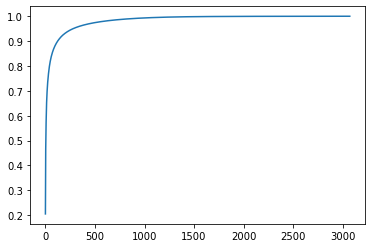

In [178]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [179]:
pca = PCA(n_components=0.9)
train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
print("numer of attributes after PCA: ",pca.n_components_,"\nnumber of attributes before PCA: ",len(list(x_train.columns)))

numer of attributes after PCA:  125 
number of attributes before PCA:  3072


125


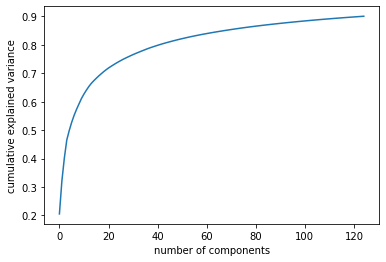

In [180]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca.n_components_)

In [181]:
X_train_PCA1 = pd.DataFrame(train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

[0.497, 0.507, 0.5014]


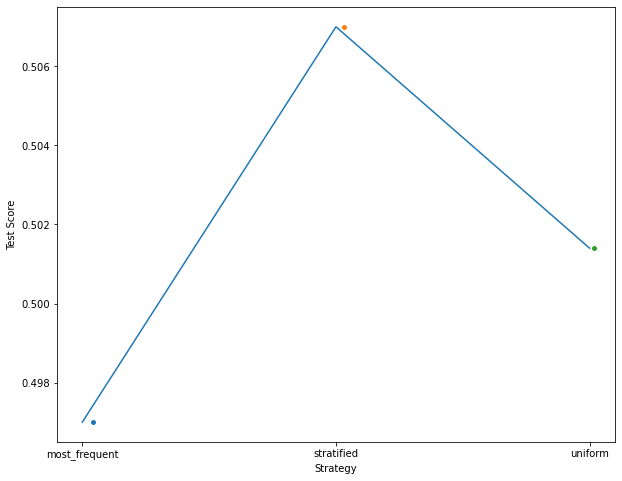

In [182]:
strategies = ['most_frequent','stratified', 'uniform'] 
test_scores = [] 
for s in strategies: 
    if s == 'most_frequent':
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train_PCA1, y_train) 
    score = dclf.score(x_test, y_test) 
    test_scores.append(score) 
print(test_scores)
plt.figure(figsize=(10,8))
ax = sns.stripplot(strategies,test_scores)
sns.lineplot(x=strategies,y=test_scores,ax=ax)
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

In [183]:
def stats(model):
    y_pred=model.predict(X_test_PCA1)
    plt.figure(1, figsize= (10,10))
    c_m=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion Matrix ")
    sns.heatmap(c_m.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    plt.close()
    print(classification_report(y_test, y_pred,digits=4))

In [184]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)
print(metrics.accuracy_score(y_test,Y_pred))

0.5974


In [ ]:
    knn_param_grid =     {
         'n_neighbors': list(range(3,100,10)),
         'weights':['uniform','distance'],
         'metric': ['euclidean','manhattan','minkowski'],
        }

    knn_grid_search = RandomizedSearchCV(
        KNeighborsClassifier(n_jobs=-1),
        knn_param_grid,
        cv=3,
        scoring='accuracy',
        return_train_score=True,
        random_state=0
    )
    knn_grid_search.fit(X_train_PCA1, y_train)
    
knn_grid.best_estimator_

In [ ]:
knn_grid.best_score_

Confusion Matrix 


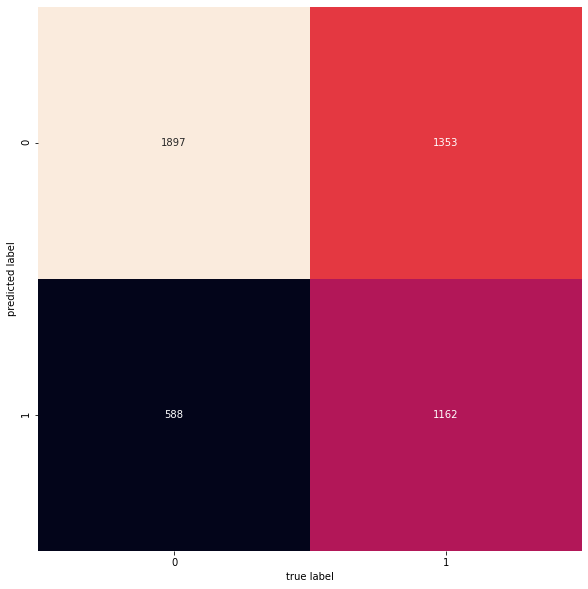

              precision    recall  f1-score   support

           0     0.5837    0.7634    0.6616      2485
           1     0.6640    0.4620    0.5449      2515

    accuracy                         0.6118      5000
   macro avg     0.6238    0.6127    0.6032      5000
weighted avg     0.6241    0.6118    0.6029      5000



In [185]:
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

Confusion Matrix 


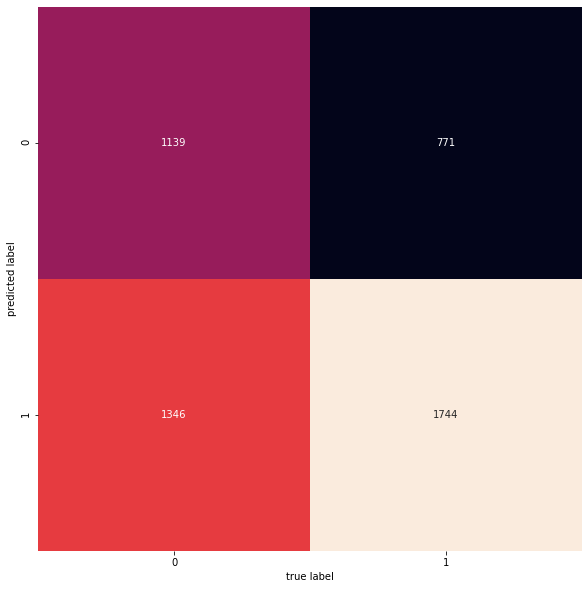

              precision    recall  f1-score   support

           0     0.5963    0.4584    0.5183      2485
           1     0.5644    0.6934    0.6223      2515

    accuracy                         0.5766      5000
   macro avg     0.5804    0.5759    0.5703      5000
weighted avg     0.5803    0.5766    0.5706      5000



In [35]:
# Build gaussian naive bayes model
gnb = GaussianNB()
gnb.fit(X_train_PCA1,y_train)
y_pred = gnb.predict(X_test_PCA1)
scores["gnb"]=accuracy_score(y_test, y_pred)
stats(gnb)

Confusion Matrix 


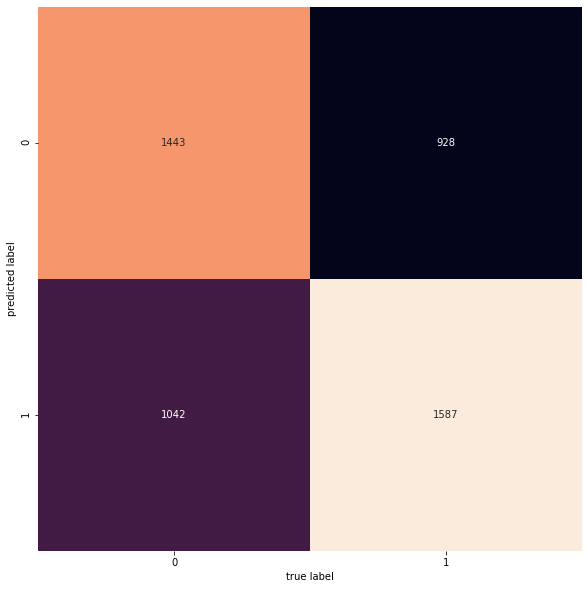

              precision    recall  f1-score   support

           0     0.6086    0.5807    0.5943      2485
           1     0.6037    0.6310    0.6170      2515

    accuracy                         0.6060      5000
   macro avg     0.6061    0.6058    0.6057      5000
weighted avg     0.6061    0.6060    0.6057      5000



In [36]:
# Build LogisticRegression model
clf_log = LogisticRegression(n_jobs = -1)
clf_log.fit(X_train_PCA1,y_train)
y_pred_logistic= clf_log.predict(X_test_PCA1)
scores["clf_log"]=accuracy_score(y_test, y_pred_logistic)
stats(clf_log)

In [45]:
    clf=RandomForestClassifier(n_estimators=250)
    clf.fit(X_train_PCA1, y_train)
    y_pred=clf.predict(X_test_pca)
    print(metrics.accuracy_score(y_test, y_pred))

0.6304


In [ ]:
forest_params = {
     'n_estimators': [100,200,400],
     'max_depth':[None,30,100],
     'max_features': ['auto','sqrt','log2'],
     'random_state':[0]
}

forest_grid_search = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1),
    forest_params,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    random_state=0
)

forest_grid_search.fit(x_train_scaled,y_train)

In [ ]:
forest_grid_search.best_score_

Confusion Matrix 


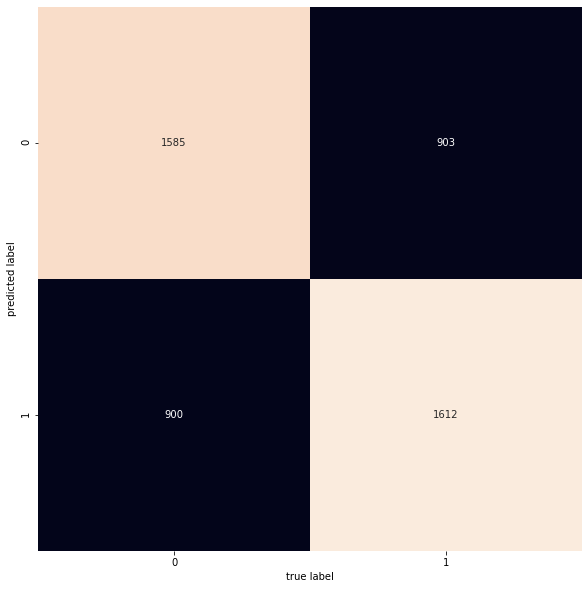

              precision    recall  f1-score   support

           0     0.6371    0.6378    0.6374      2485
           1     0.6417    0.6410    0.6413      2515

    accuracy                         0.6394      5000
   macro avg     0.6394    0.6394    0.6394      5000
weighted avg     0.6394    0.6394    0.6394      5000



In [34]:
# Build random forest model
random_forest = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
random_forest.fit(X_train_PCA1, y_train)
y_pred_forest = random_forest.predict(X_test_pca)

scores["random_forest"]=accuracy_score(y_test, y_pred_forest)
stats(random_forest)

In [44]:
# set the xgboost model.
xgb_reg = xgboost.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(y_test, y_pred_xgb_reg)

print("Test Accuracy score: {}".format(xgb_reg_accuracy))

Test Accuracy score: 0.6368


In [ ]:
  xgb_params = {
        'max_depth': [3,6,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'colsample_bytree': [0.3, 0.7]
    }

    xgb_clf = XGBClassifier(
        objective='multi:softmax',
        gamma = 0,
        colsample_bytree = 0.8)

    XGBGridsearch = RandomizedSearchCV(xgb_clf, xgb_params,scoring='accuracy',cv=3, random_state=0,n_jobs=-1)
    XGBGridsearch.fit(X_train_PCA1, y_train)

xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_score_

[10:28:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


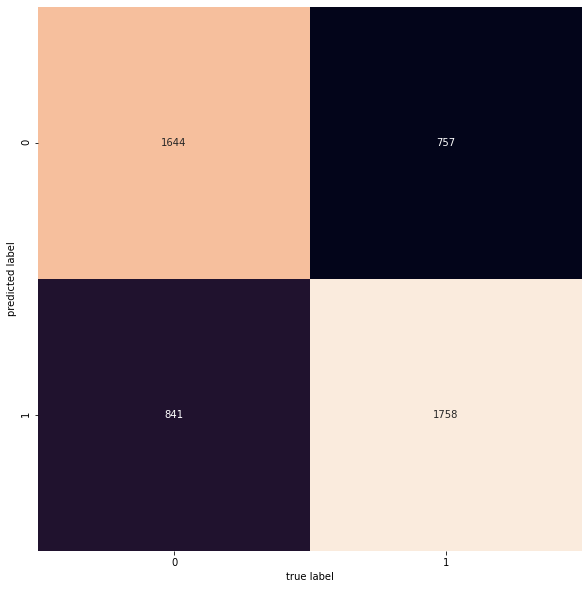

              precision    recall  f1-score   support

           0     0.6847    0.6616    0.6729      2485
           1     0.6764    0.6990    0.6875      2515

    accuracy                         0.6804      5000
   macro avg     0.6806    0.6803    0.6802      5000
weighted avg     0.6805    0.6804    0.6803      5000



In [32]:
# Build xgboost model
xgb_reg = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred = xgb_reg.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(y_test, y_pred)


scores["XGBoost"]=accuracy_score(y_test,y_pred)
stats(xgb_reg)

In [46]:
# set the adaboost model with the new form,after pca.
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,algorithm="SAMME.R",learning_rate=0.35
)
model=classifier.fit(X_train_PCA1,y_train)

y_pred_ada = model.predict(X_test_PCA1)
ada_accuracy = metrics.accuracy_score(y_test, y_pred_ada)

print("Test Accuracy score: {}".format(ada_accuracy))

Test Accuracy score: 0.6378


In [ ]:
# making a grid search to tuning the adaboost model with the best parameters it can give
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              "base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train_PCA1, Y_train)
y_pred_ada = clf.predict(X_test_PCA1)
ada_accuracy = metrics.accuracy_score(y_test, y_pred_ada)

print("Test Accuracy score: {}".format(ada_accuracy))

In [ ]:
#the best parameters we get from the gridsearch
best_model = clf.best_estimator_
best_model

Confusion Matrix 


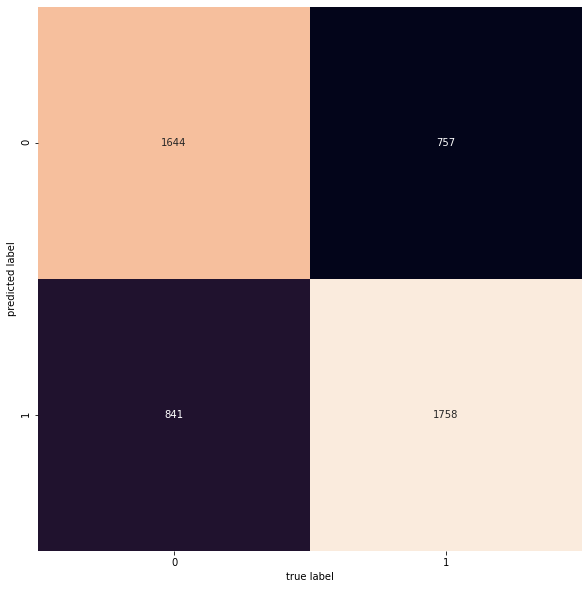

              precision    recall  f1-score   support

           0     0.6847    0.6616    0.6729      2485
           1     0.6764    0.6990    0.6875      2515

    accuracy                         0.6804      5000
   macro avg     0.6806    0.6803    0.6802      5000
weighted avg     0.6805    0.6804    0.6803      5000



In [43]:
# Build "hard" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='hard',weights=[1,4,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)

[11:23:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


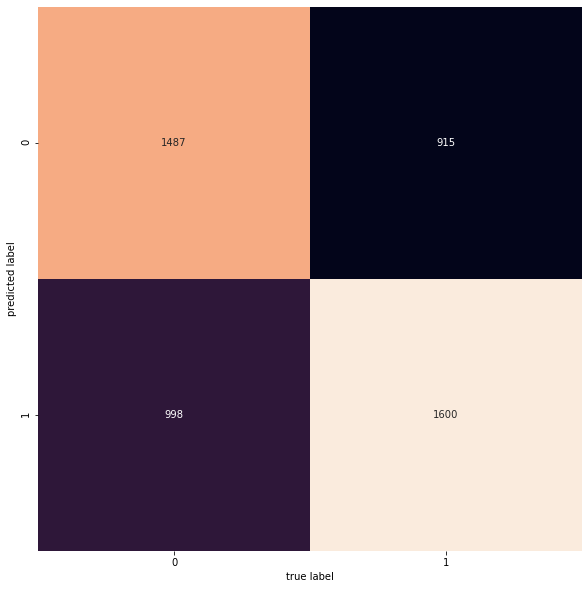

              precision    recall  f1-score   support

           0     0.6191    0.5984    0.6086      2485
           1     0.6159    0.6362    0.6259      2515

    accuracy                         0.6174      5000
   macro avg     0.6175    0.6173    0.6172      5000
weighted avg     0.6175    0.6174    0.6173      5000



In [50]:
# Build stack model
stack_model = StackingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('knn_bag', BaggingClassifier(knn))],final_estimator=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))
stack_model.fit(X_train_PCA1,y_train)
y_test_pred = stack_model.predict(X_test_PCA1)


scores["stack_model"]=accuracy_score(y_test, y_test_pred)
stats(stack_model)

Confusion Matrix 


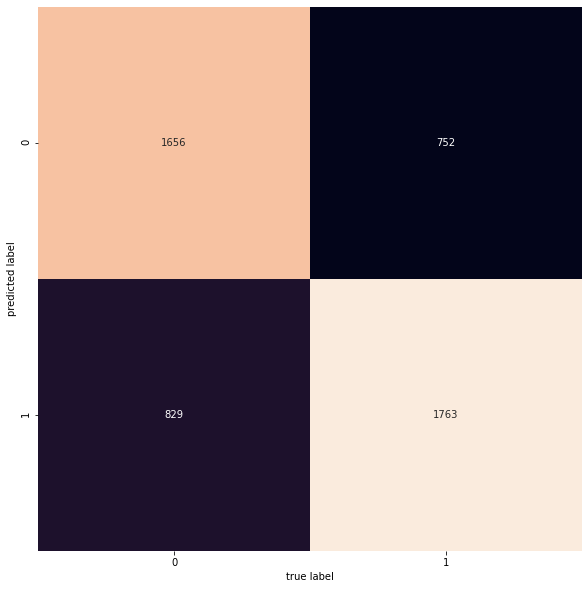

              precision    recall  f1-score   support

           0     0.6877    0.6664    0.6769      2485
           1     0.6802    0.7010    0.6904      2515

    accuracy                         0.6838      5000
   macro avg     0.6839    0.6837    0.6837      5000
weighted avg     0.6839    0.6838    0.6837      5000



In [38]:
# Build "soft" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='soft',weights=[1,4,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)